In [55]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sb 
import matplotlib.pyplot as plt
import plotly as plotly

In [2]:
# df = pd.read_csv('EFL_Champ_19_20.csv')
col_list = ['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']

In [40]:
path = r'C:\Users\tcoop\Documents\Data Science\Python\Playoff Predictor Blog'
all_files = glob.glob(path + "/*.csv")

list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, engine='python', usecols=col_list)
    df['Season'] = filename[-19:-4]
    list.append(df)

frame = pd.concat(list, axis=0, ignore_index=True)
frame

frame.isnull()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,Season
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:

PromTeams = {}
  
PromTeams["EFL_Champ_19_20"] = ['Fulham', 'Leeds','West Brom']
PromTeams["EFL_Champ_18_19"] = ['Norwich', 'Aston Villa','Sheffield United']
PromTeams["EFL_Champ_17_18"] = ['Fulham', 'Wolves','Cardiff']
PromTeams["EFL_Champ_16_17"] = ['Newcastle', 'Brighton','Huddersfield']
PromTeams["EFL_Champ_15_16"] = ['Hull','Burnley','Middlesbrough']
PromTeams["EFL_Champ_14_15"] = ['Norwich', 'Bournemouth','Watford']
PromTeams["EFL_Champ_13_14"] = ['Leicester','QPR','Burnley']
PromTeams["EFL_Champ_12_13"] = ['Cardiff','Hull','Crystal Palace']
PromTeams["EFL_Champ_11_12"] = ['West Ham','Reading','Southampton']
PromTeams["EFL_Champ_10_11"] = ['Swansea','QPR','Norwich']
PromTeams["EFL_Champ_09_10"] = ['Blackpool','Newcastle','West Brom']
PromTeams["EFL_Champ_08_09"] = ['Burnley','Birmingham','Wolves']
PromTeams["EFL_Champ_07_08"] = ['Hull','Stoke','West Brom']
PromTeams["EFL_Champ_06_07"] = ['Derby','Sunderland','Birmingham']
PromTeams["EFL_Champ_05_06"] = ['Watford','Reading','Sheffield United']
PromTeams["EFL_Champ_04_05"] = ['Sunderland','Wigan',"West Ham"]
PromTeams["EFL_Champ_03_04"] = ['Norwich','West Brom',"Crystal Palace"]
PromTeams["EFL_Champ_02_03"] = ['Portsmouth','Leicester','Wolves']
PromTeams["EFL_Champ_01_02"] = ['Man City','West Brom','Birmingham']
PromTeams["EFL_Champ_00_01"] = ['Bolton','Fulham','Blackburn']


In [5]:
SurvivedTeams = {}
  
SurvivedTeams["EFL_Champ_19_20"] = ['Leeds']
SurvivedTeams["EFL_Champ_18_19"] = ['Aston Villa','Sheffield United']
SurvivedTeams["EFL_Champ_17_18"] = ['Wolves']
SurvivedTeams["EFL_Champ_16_17"] = ['Huddersfield','Newcastle','Brighton']
SurvivedTeams["EFL_Champ_15_16"] = ['Burnley']
SurvivedTeams["EFL_Champ_14_15"] = ['Bournemouth','Watford']
SurvivedTeams["EFL_Champ_13_14"] = ['Leicester']
SurvivedTeams["EFL_Champ_12_13"] = ['Crystal Palace','Hull']
SurvivedTeams["EFL_Champ_11_12"] = ['West Ham','Southampton']
SurvivedTeams["EFL_Champ_10_11"] = ['Swansea','QPR','Norwich']
SurvivedTeams["EFL_Champ_09_10"] = ['Newcastle','West Brom']
SurvivedTeams["EFL_Champ_08_09"] = ['Birmingham','Wolves']
SurvivedTeams["EFL_Champ_07_08"] = ['Hull','Stoke']
SurvivedTeams["EFL_Champ_06_07"] = ['Sunderland']
SurvivedTeams["EFL_Champ_05_06"] = ['Reading']
SurvivedTeams["EFL_Champ_04_05"] = ['West Ham','Wigan']
SurvivedTeams["EFL_Champ_03_04"] = ['West Brom']
SurvivedTeams["EFL_Champ_02_03"] = ['Portsmouth']
SurvivedTeams["EFL_Champ_01_02"] = ['Birmingham','Man City']
SurvivedTeams["EFL_Champ_00_01"] = ['Bolton','Fulham','Blackburn']

In [6]:
for key, values in PromTeams.items():
    z = frame[(~frame.HomeTeam.str.contains('|'.join(values), na=False)) & 
              (~frame.AwayTeam.str.contains('|'.join(values), na=False)) & 
              (frame.Season.str.contains(key))].index
    frame.drop(z , inplace=True)
        
frame
 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,Season
1,E1,12/08/00,Blackburn,Crystal Palace,2.0,0.0,H,2.0,0.0,H,...,0.0,7.0,4.0,14.0,17.0,1.0,4.0,0.0,0.0,EFL_Champ_00_01
2,E1,12/08/00,Bolton,Burnley,1.0,1.0,D,1.0,0.0,H,...,1.0,3.0,5.0,14.0,14.0,2.0,1.0,0.0,0.0,EFL_Champ_00_01
3,E1,12/08/00,Fulham,Crewe,2.0,0.0,H,0.0,0.0,D,...,1.0,10.0,1.0,4.0,9.0,0.0,1.0,0.0,0.0,EFL_Champ_00_01
12,E1,18/08/00,Birmingham,Fulham,1.0,3.0,A,1.0,3.0,A,...,9.0,2.0,9.0,14.0,7.0,1.0,2.0,0.0,0.0,EFL_Champ_00_01
14,E1,19/08/00,Crewe,Blackburn,0.0,0.0,D,0.0,0.0,D,...,3.0,0.0,4.0,6.0,12.0,2.0,1.0,0.0,0.0,EFL_Champ_00_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11021,E1,18/07/2020,Fulham,Sheffield Weds,5.0,3.0,H,3.0,0.0,H,...,6.0,4.0,8.0,12.0,14.0,1.0,0.0,1.0,0.0,EFL_Champ_19_20
11027,E1,19/07/2020,Derby,Leeds,1.0,3.0,A,0.0,0.0,D,...,8.0,4.0,5.0,8.0,10.0,1.0,0.0,0.0,0.0,EFL_Champ_19_20
11033,E1,22/07/2020,Leeds,Charlton,4.0,0.0,H,2.0,0.0,H,...,4.0,10.0,4.0,14.0,10.0,1.0,0.0,0.0,0.0,EFL_Champ_19_20
11039,E1,22/07/2020,West Brom,QPR,2.0,2.0,D,1.0,1.0,D,...,3.0,5.0,3.0,13.0,9.0,0.0,0.0,0.0,0.0,EFL_Champ_19_20


In [7]:
 columns = ['Team', 'Season', 'StayedUp', 'MeanHomeGoals', 'MeanAwayGoals', 'MeanHomeShots', 'MeanAwayShots', 'MeanHomeSOT',
            'MeanAwaySOT']


In [8]:
df2 = pd.DataFrame(columns=columns)
for key, values in PromTeams.items():
    for value in values:
        Games = pd.DataFrame()
        Games = frame[((frame.HomeTeam == value)|(frame.AwayTeam == value))&(frame.Season == key)].head(46)
        HomeGames = Games[(Games.HomeTeam == value)]
        AwayGames = Games[(Games.AwayTeam == value)]
        HomeDraws = HomeGames['FTR'].value_counts().to_dict()
        AwayDraws = AwayGames['FTR'].value_counts().to_dict()
        HomeWins = HomeGames['FTR'].value_counts().to_dict()
        AwayWins = AwayGames['FTR'].value_counts().to_dict()

        HP = (HomeDraws.get('D',0)+3*HomeWins.get('H',0))
        AP = (AwayDraws.get('D',0)+3*AwayWins.get('A',0))
        df2 = df2.append({'Team': value, 
                          'Season': HomeGames['Season'].iloc[0],
                          'MeanHomeGoals': HomeGames['FTHG'].mean(),
                          'MeanAwayGoals': AwayGames['FTAG'].mean(),
                          'MeanHomeGoalsConceded': HomeGames['FTAG'].mean(),
                          'MeanAwayGoalsConceded': AwayGames['FTHG'].mean(),
                          'MeanHomeShots': HomeGames['HS'].mean(),
                          'MeanAwayShots': AwayGames['AS'].mean(),
                          'MeanHomeSOT': HomeGames['HST'].mean(),
                          'MeanAwaySOT': AwayGames['AST'].mean(),
                          'HomePoints': HP, 'AwayPoints': AP,
                          'HomePointPercentage': HP/(3*(HomeGames.shape[0])),
                          'AwayPointPercentage' : (AP/(3*AwayGames.shape[0]))},
                          ignore_index=True)






df2['MeanGoals'] = (df2['MeanHomeGoals']+df2['MeanAwayGoals'])/2
df2['MeanGoalsConceded'] = (df2['MeanHomeGoalsConceded']+df2['MeanAwayGoalsConceded'])/2
df2['MeanShots'] = (df2['MeanHomeShots']+df2['MeanAwayShots'])/2
df2['MeanSOT'] = (df2['MeanHomeSOT']+df2['MeanAwaySOT'])/2
df2['TotalPoints'] = df2['HomePoints']+df2['AwayPoints']

df2

,Team,Season,StayedUp,MeanHomeGoals,MeanAwayGoals,MeanHomeShots,MeanAwayShots,MeanHomeSOT,MeanAwaySOT,AwayPointPercentage,AwayPoints,HomePointPercentage,HomePoints,MeanAwayGoalsConceded,MeanHomeGoalsConceded,MeanGoals,MeanGoalsConceded,MeanShots,MeanSOT,TotalPoints
0,Fulham,EFL_Champ_19_20,NaN,1.739130,1.043478,14.913043,12.217391,5.434783,3.956522,0.492754,34.0,0.681159,47.0,0.956522,1.130435,1.391304,1.043478,13.565217,4.695652,81.0
1,Leeds,EFL_Champ_19_20,NaN,1.739130,1.608696,17.000000,15.608696,5.956522,5.043478,0.623188,43.0,0.724638,50.0,0.913043,0.608696,1.673913,0.760870,16.304348,5.500000,93.0
2,West Brom,EFL_Champ_19_20,NaN,1.913043,1.434783,15.391304,14.000000,5.652174,4.000000,0.623188,43.0,0.579710,40.0,0.782609,1.173913,1.673913,0.978261,14.695652,4.826087,83.0
3,Norwich,EFL_Champ_18_19,NaN,2.217391,1.826087,16.304348,14.260870,5.565217,5.478261,0.652174,45.0,0.710145,49.0,1.000000,1.478261,2.021739,1.239130,15.282609,5.521739,94.0
4,Aston Villa,EFL_Champ_18_19,NaN,2.173913,1.391304,16.130435,12.260870,5.913043,4.347826,0.507246,35.0,0.594203,41.0,1.086957,1.565217,1.782609,1.326087,14.195652,5.130435,76.0
5,Sheffield United,EFL_Champ_18_19,NaN,1.826087,1.565217,13.173913,12.173913,4.391304,4.130435,0.579710,40.0,0.710145,49.0,1.043478,0.739130,1.695652,0.891304,12.673913,4.260870,89.0
6,Fulham,EFL_Champ_17_18,NaN,1.739130,1.695652,15.478261,12.173913,4.826087,4.260870,0.594203,41.0,0.681159,47.0,1.260870,0.739130,1.717391,1.000000,13.826087,4.543478,88.0
7,Wolves,EFL_Champ_17_18,NaN,2.043478,1.521739,14.347826,12.000000,5.043478,4.391304,0.666667,46.0,0.768116,53.0,0.913043,0.782609,1.782609,0.847826,13.173913,4.717391,99.0
8,Cardiff,EFL_Champ_17_18,NaN,1.739130,1.260870,15.434783,12.347826,5.956522,3.913043,0.550725,38.0,0.753623,52.0,1.000000,0.695652,1.500000,0.847826,13.891304,4.934783,90.0
9,Newcastle,EFL_Champ_16_17,NaN,2.130435,1.565217,16.869565,13.739130,5.782609,5.130435,0.666667,46.0,0.695652,48.0,0.739130,1.000000,1.847826,0.869565,15.304348,5.456522,94.0


In [9]:
df2["StayedUp"] = 0
for key, values in SurvivedTeams.items():
    for value in values:
         df2.loc[(df2["Season"] == key) & (df2["Team"] == value), "StayedUp"] = 1
df2.round(2)


,Team,Season,StayedUp,MeanHomeGoals,MeanAwayGoals,MeanHomeShots,MeanAwayShots,MeanHomeSOT,MeanAwaySOT,AwayPointPercentage,AwayPoints,HomePointPercentage,HomePoints,MeanAwayGoalsConceded,MeanHomeGoalsConceded,MeanGoals,MeanGoalsConceded,MeanShots,MeanSOT,TotalPoints
0,Fulham,EFL_Champ_19_20,0,1.74,1.04,14.91,12.22,5.43,3.96,0.49,34.0,0.68,47.0,0.96,1.13,1.39,1.04,13.57,4.70,81.0
1,Leeds,EFL_Champ_19_20,1,1.74,1.61,17.00,15.61,5.96,5.04,0.62,43.0,0.72,50.0,0.91,0.61,1.67,0.76,16.30,5.50,93.0
2,West Brom,EFL_Champ_19_20,0,1.91,1.43,15.39,14.00,5.65,4.00,0.62,43.0,0.58,40.0,0.78,1.17,1.67,0.98,14.70,4.83,83.0
3,Norwich,EFL_Champ_18_19,0,2.22,1.83,16.30,14.26,5.57,5.48,0.65,45.0,0.71,49.0,1.00,1.48,2.02,1.24,15.28,5.52,94.0
4,Aston Villa,EFL_Champ_18_19,1,2.17,1.39,16.13,12.26,5.91,4.35,0.51,35.0,0.59,41.0,1.09,1.57,1.78,1.33,14.20,5.13,76.0
5,Sheffield United,EFL_Champ_18_19,1,1.83,1.57,13.17,12.17,4.39,4.13,0.58,40.0,0.71,49.0,1.04,0.74,1.70,0.89,12.67,4.26,89.0
6,Fulham,EFL_Champ_17_18,0,1.74,1.70,15.48,12.17,4.83,4.26,0.59,41.0,0.68,47.0,1.26,0.74,1.72,1.00,13.83,4.54,88.0
7,Wolves,EFL_Champ_17_18,1,2.04,1.52,14.35,12.00,5.04,4.39,0.67,46.0,0.77,53.0,0.91,0.78,1.78,0.85,13.17,4.72,99.0
8,Cardiff,EFL_Champ_17_18,0,1.74,1.26,15.43,12.35,5.96,3.91,0.55,38.0,0.75,52.0,1.00,0.70,1.50,0.85,13.89,4.93,90.0
9,Newcastle,EFL_Champ_16_17,1,2.13,1.57,16.87,13.74,5.78,5.13,0.67,46.0,0.70,48.0,0.74,1.00,1.85,0.87,15.30,5.46,94.0


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

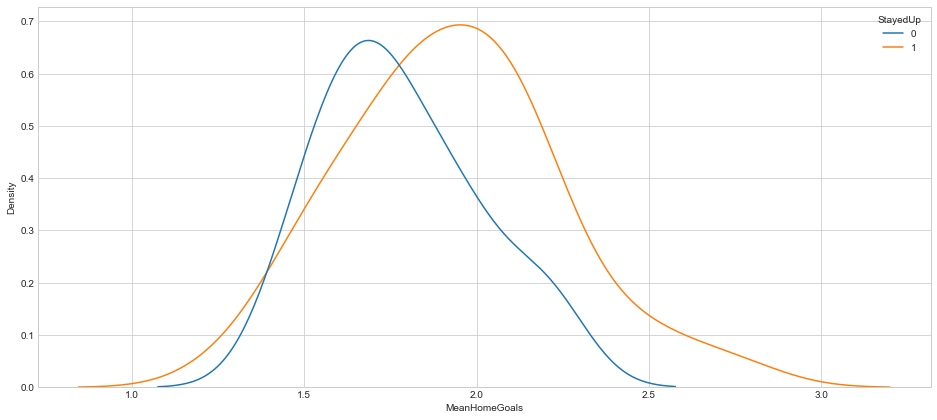

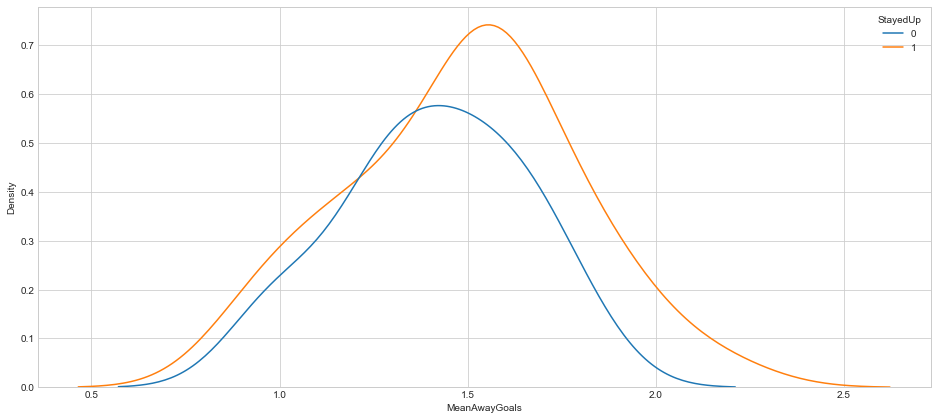

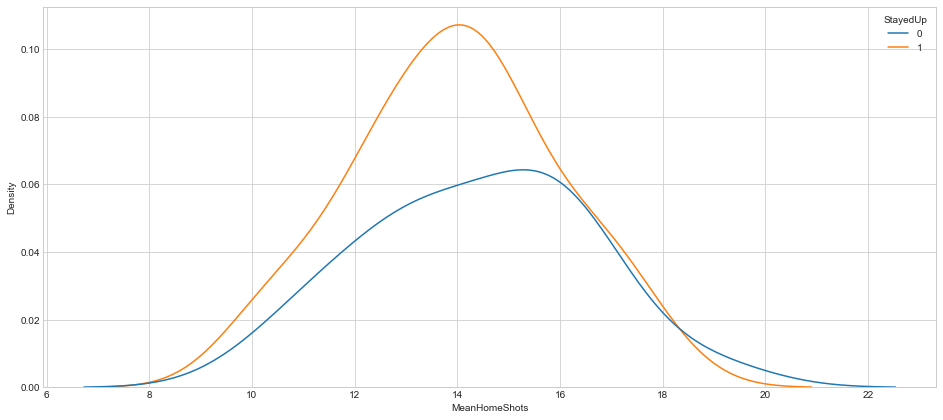

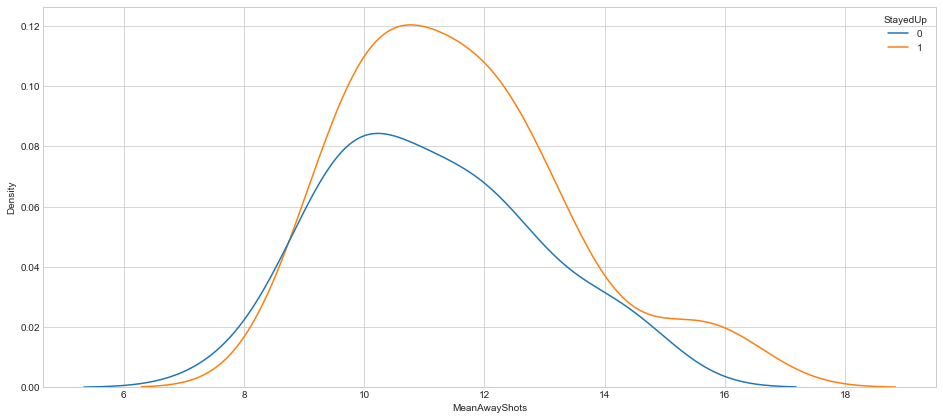

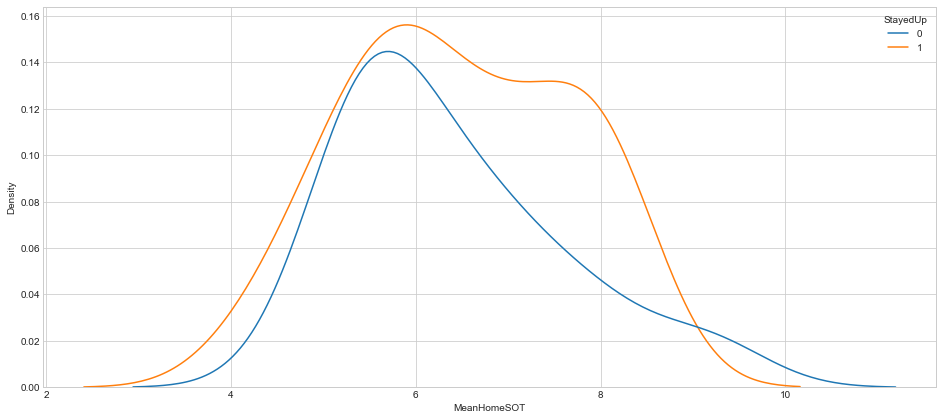

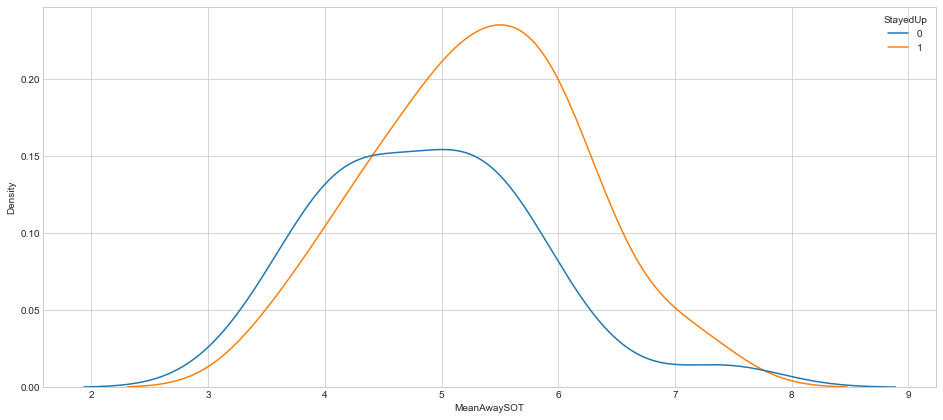

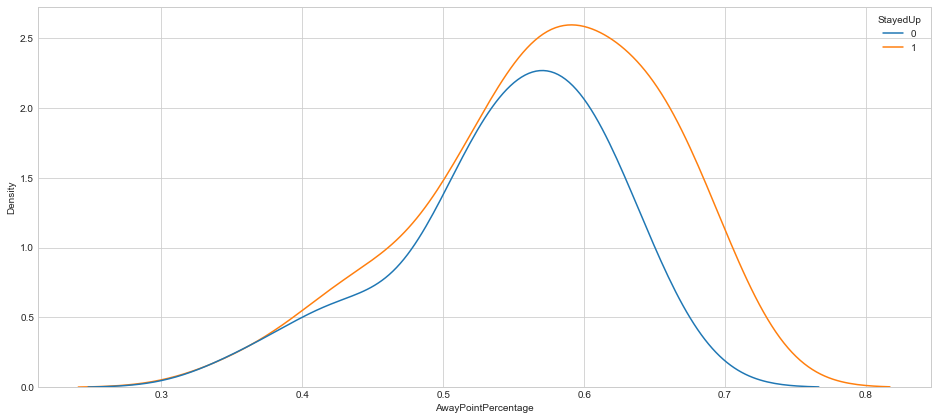

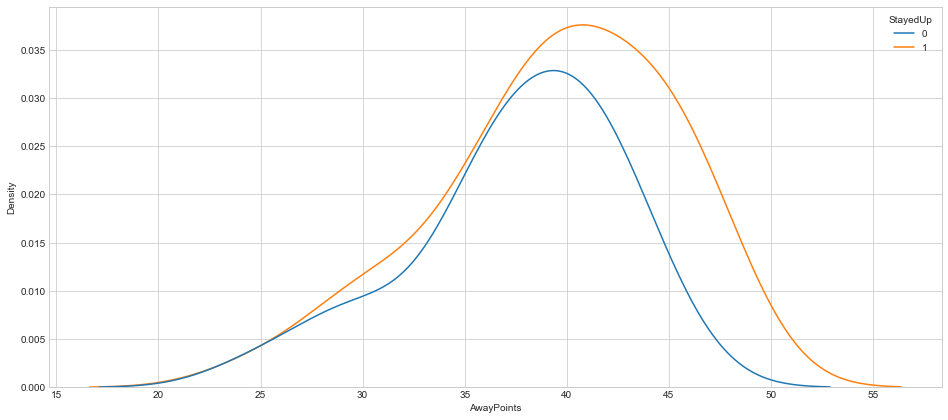

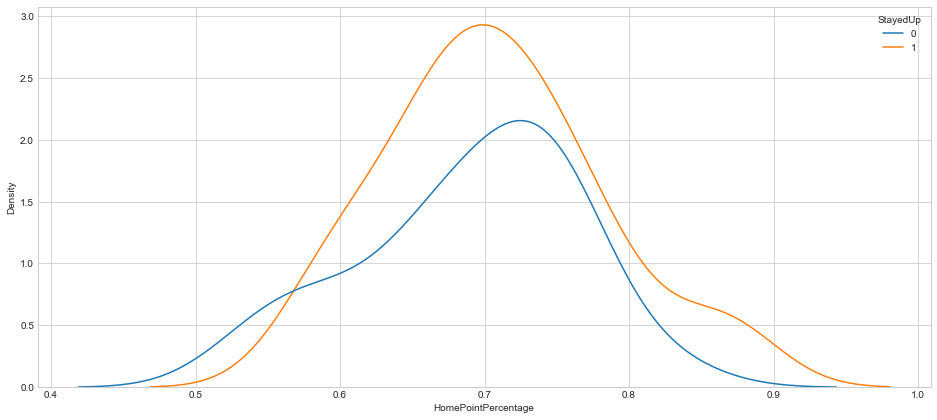

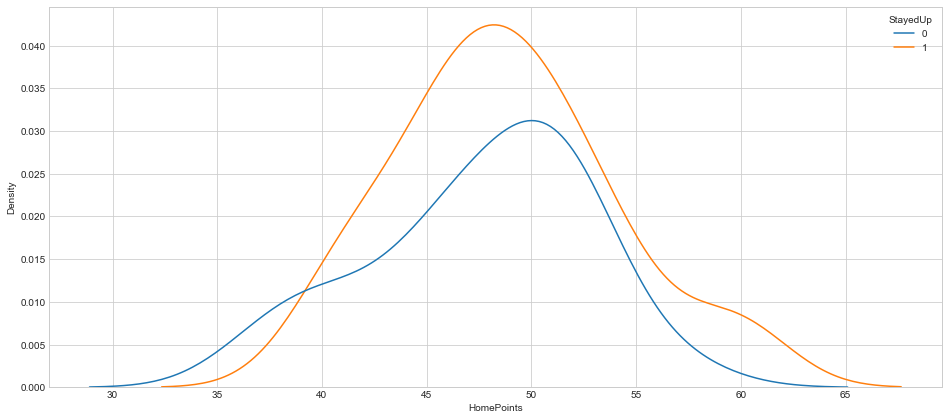

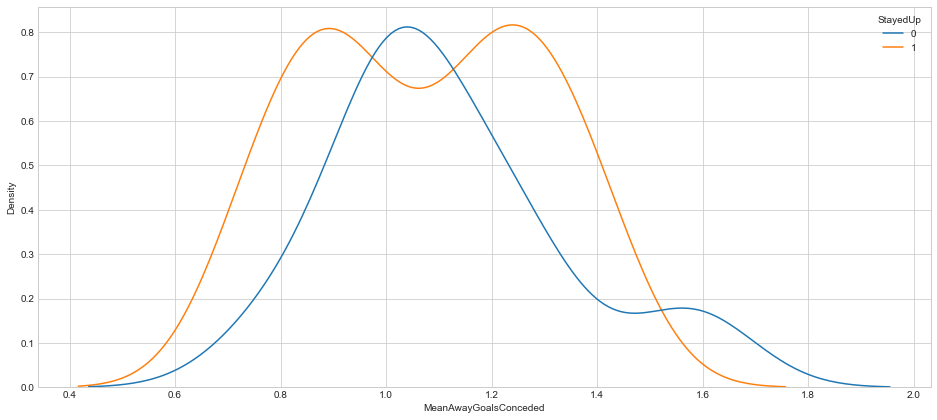

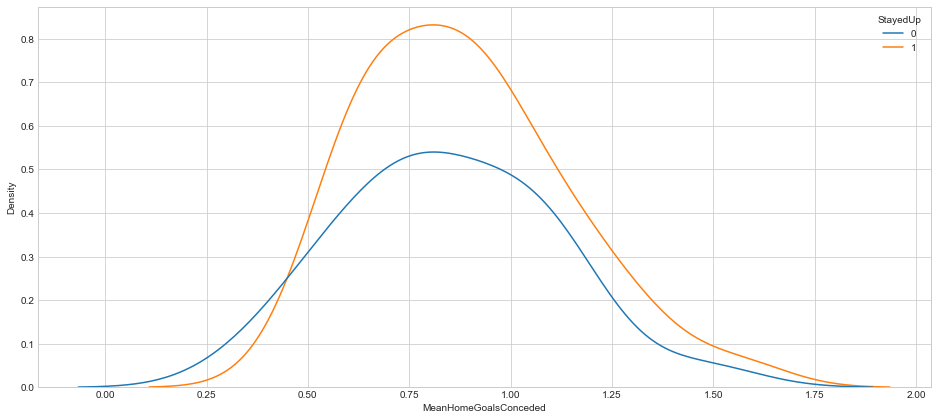

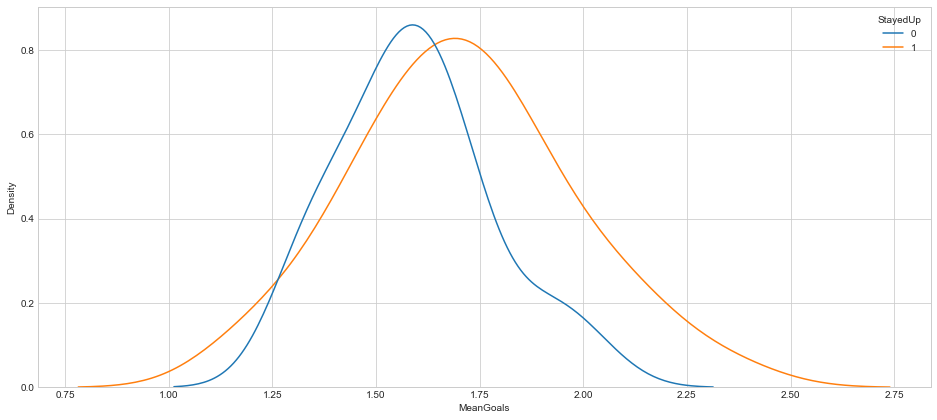

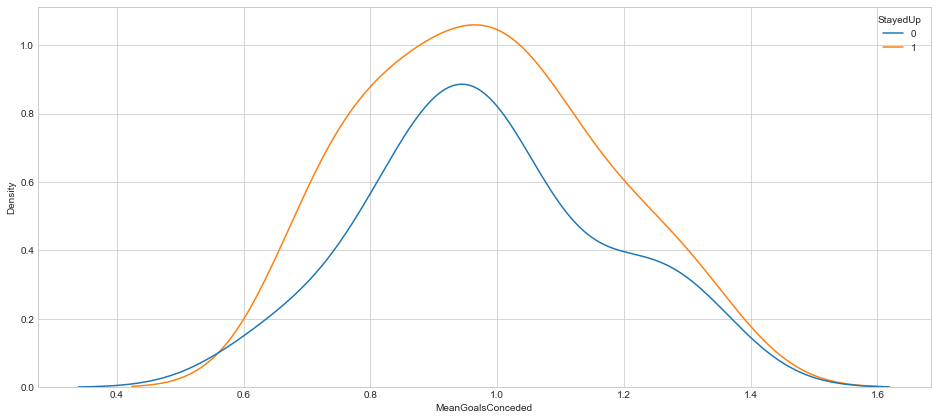

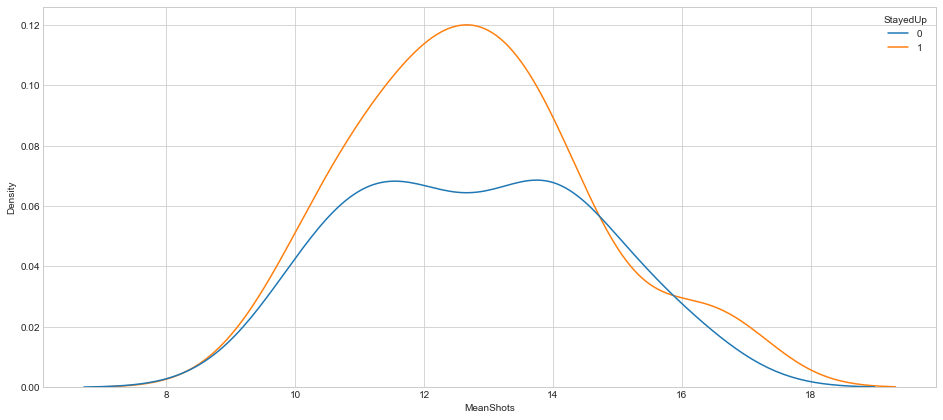

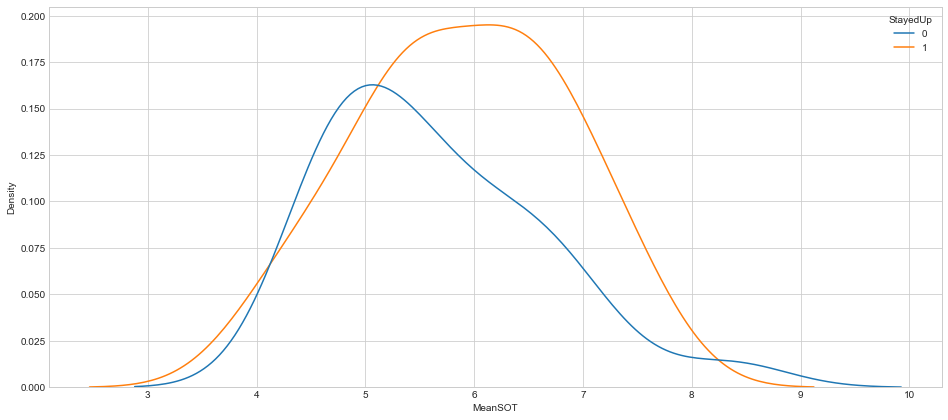

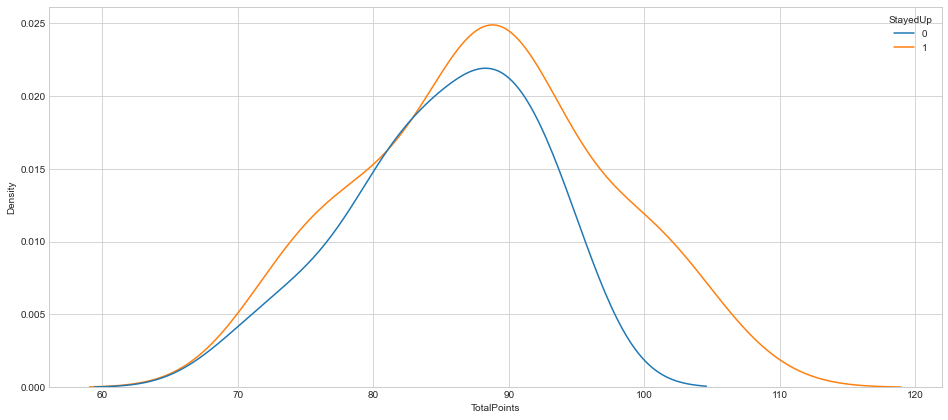

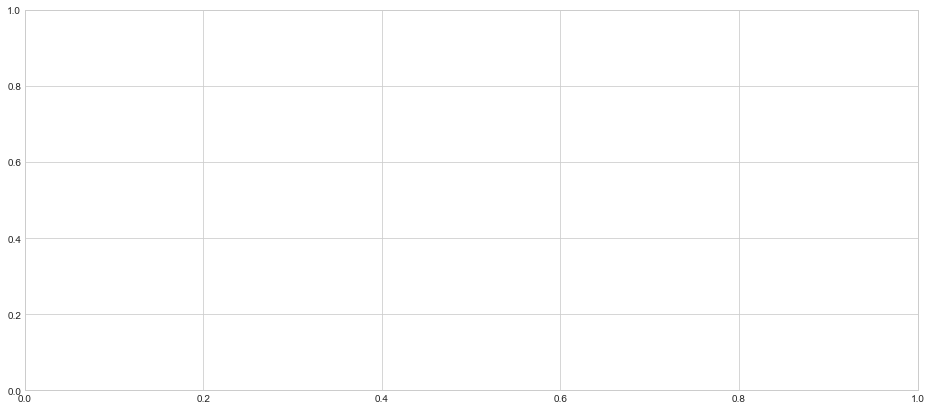

In [72]:
for col in df2.columns[3:]:
    plt.figure()
    sns.kdeplot(data=df2, x=col, hue="StayedUp")
    

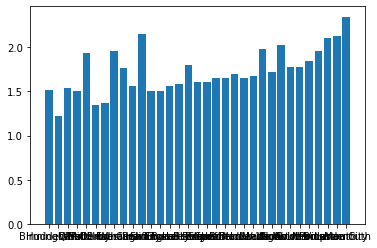

In [10]:
df2 = df2.sort_values('MeanGoals')
plt.bar(df2['Team'], df2['MeanGoals'])
plt.show()
df2['UniqueID'] = df2['Team']+' - ' + df2['Season']

[Text(0, 0, 'Blackpool - EFL_Champ_09_10'),
 Text(1, 0, 'Crystal Palace - EFL_Champ_12_13'),
 Text(2, 0, 'Crystal Palace - EFL_Champ_03_04'),
 Text(3, 0, 'West Ham - EFL_Champ_04_05'),
 Text(4, 0, 'Hull - EFL_Champ_07_08'),
 Text(5, 0, 'Burnley - EFL_Champ_08_09'),
 Text(6, 0, 'Wolves - EFL_Champ_02_03'),
 Text(7, 0, 'Birmingham - EFL_Champ_01_02'),
 Text(8, 0, 'Aston Villa - EFL_Champ_18_19'),
 Text(9, 0, 'Hull - EFL_Champ_12_13'),
 Text(10, 0, 'Stoke - EFL_Champ_07_08'),
 Text(11, 0, 'QPR - EFL_Champ_13_14'),
 Text(12, 0, 'Swansea - EFL_Champ_10_11'),
 Text(13, 0, 'Fulham - EFL_Champ_19_20'),
 Text(14, 0, 'Huddersfield - EFL_Champ_16_17'),
 Text(15, 0, 'Watford - EFL_Champ_05_06'),
 Text(16, 0, 'West Brom - EFL_Champ_07_08'),
 Text(17, 0, 'Birmingham - EFL_Champ_08_09'),
 Text(18, 0, 'Hull - EFL_Champ_15_16'),
 Text(19, 0, 'West Brom - EFL_Champ_19_20'),
 Text(20, 0, 'Norwich - EFL_Champ_10_11'),
 Text(21, 0, 'Derby - EFL_Champ_06_07'),
 Text(22, 0, 'West Ham - EFL_Champ_11_12'),
 Te

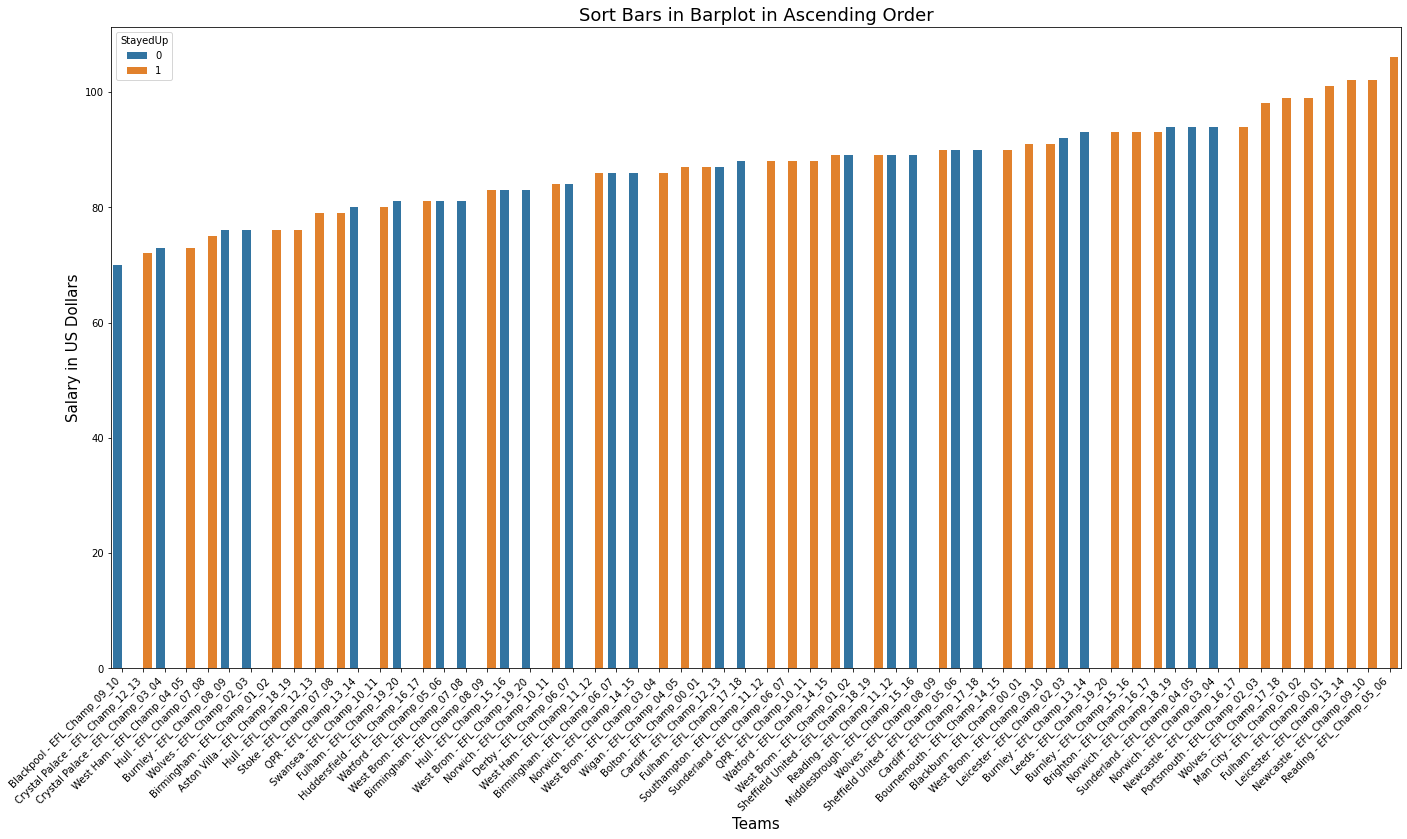

In [11]:
plt.figure(figsize=(20,10))
# df2 = df2.sort_values(['Count']).reset_index(drop=True)
# make barplot and sort bars

chart = sb.barplot(x='UniqueID',
            y='TotalPoints', 
            data=df2,  hue="StayedUp",
            order=df2.sort_values('TotalPoints').UniqueID)
# set labels
plt.xlabel("Teams", size=15)
plt.ylabel("Salary in US Dollars", size=15)
plt.title("Sort Bars in Barplot in Ascending Order", size=18)
plt.tight_layout()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [12]:
df_prom = df2[(df2.StayedUp == 1)]
df_rel = df2[(df2.StayedUp == 0)]
len(df_prom)
len(df_rel)

25

In [81]:
df_mean = pd.DataFrame()
for value in c:
   # print(value + ' for staying up mean is ' + str(df_prom[value].mean()))
    #print(value + ' for relegated mean is ' + str(df_rel[value].mean()))
    print(value + ' difference ' + str((df_prom[value].mean())-(df_rel[value].mean())))
df_mean

MeanHomeGoals difference 0.1470807453416143
MeanAwayGoals difference 0.07999999999999985
MeanHomeShots difference -0.44173913043477775
MeanAwayShots difference 0.4367701863354032
MeanHomeSOT difference 0.0782608695652165
MeanAwaySOT difference 0.43130434782608607
AwayPointPercentage difference 0.0269151138716357
HomePointPercentage difference 0.017556935817805486
MeanAwayGoalsConceded difference -0.04621118012422354
MeanHomeGoalsConceded difference 0.037515527950310545
MeanGoals difference 0.11354037267080752
MeanGoalsConceded difference -0.004347826086956608
MeanShots difference -0.0024844720496908224
MeanSOT difference 0.2547826086956526
TotalPoints difference 3.068571428571431


""


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


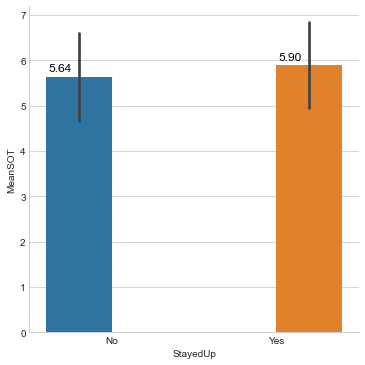

In [83]:
g = sb.catplot(x="StayedUp",y="MeanSOT", hue="StayedUp", kind="bar", data=df2, ci='sd')
g.set_xticklabels(["No", "Yes"])
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

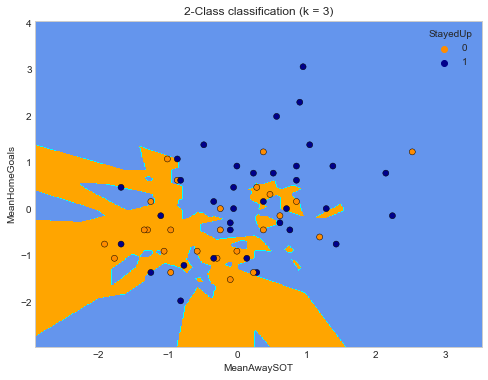

Index(['MeanHomeGoals', 'MeanAwayGoals', 'MeanHomeShots', 'MeanAwayShots',
       'MeanHomeSOT', 'MeanAwaySOT', 'AwayPointPercentage',
       'HomePointPercentage', 'MeanAwayGoalsConceded', 'MeanHomeGoalsConceded',
       'MeanGoals', 'MeanGoalsConceded', 'MeanShots', 'MeanSOT',
       'TotalPoints'],
      dtype='object')


In [78]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from random import randrange, uniform

# randrange gives you an integral value
irand1 = randrange(0, 15)
irand2 = randrange(0,15)

n_neighbors = 3

# import some data to play with

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'darkblue']



X = X_all[:, np.r_[irand1:(irand1+1), irand2:(irand2+1)]]
y = y_all
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))
plt.xlabel(c[irand1])
plt.ylabel(c[irand2])
plt.show()
print(c)


<ipython-input-95-3893843438a9>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


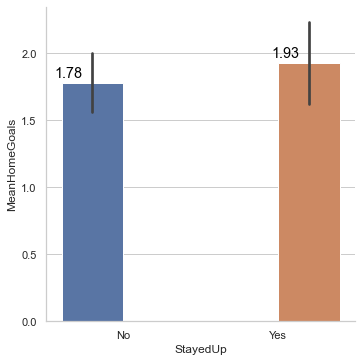

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


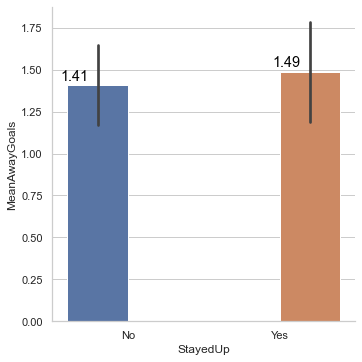

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


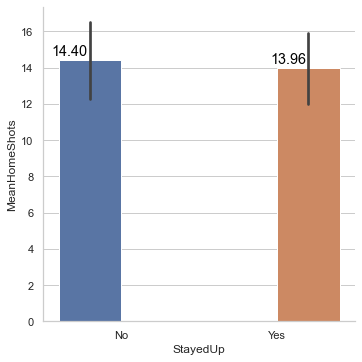

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


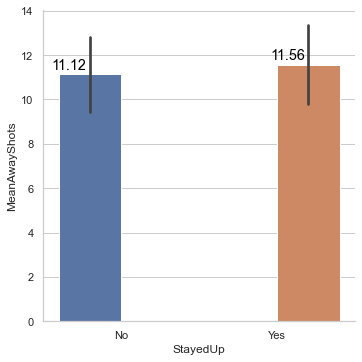

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


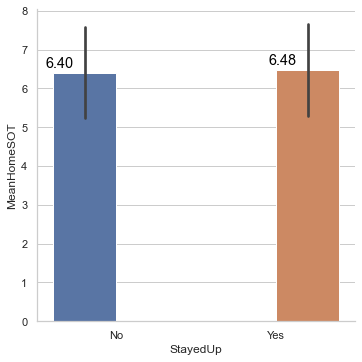

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


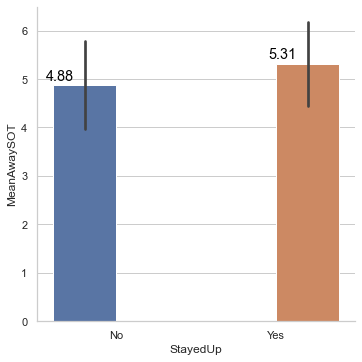

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


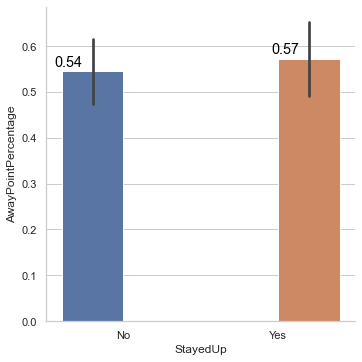

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


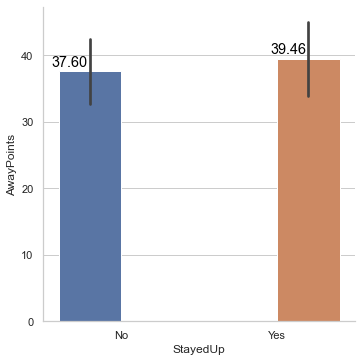

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


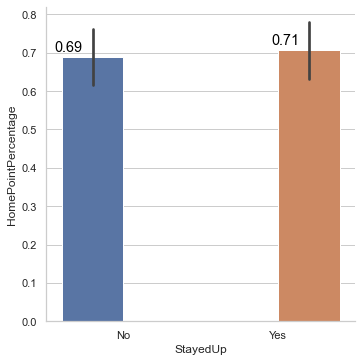

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


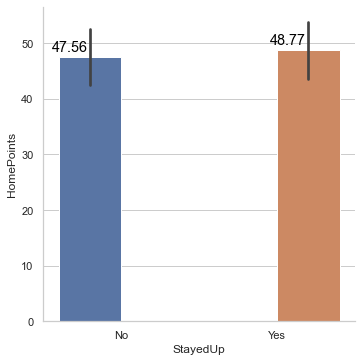

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


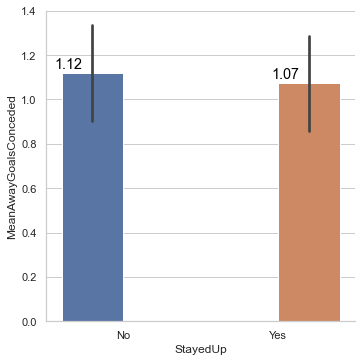

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


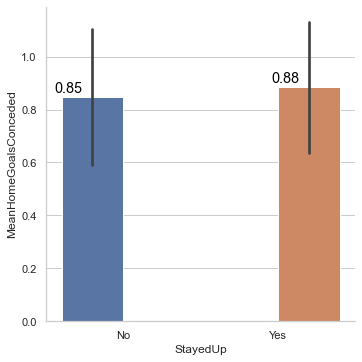

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


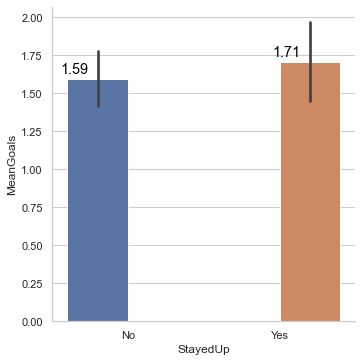

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


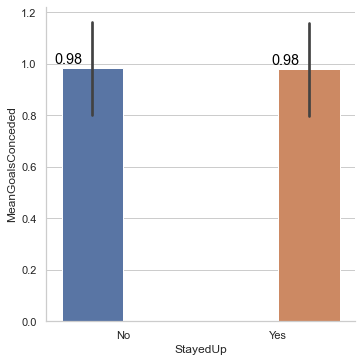

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


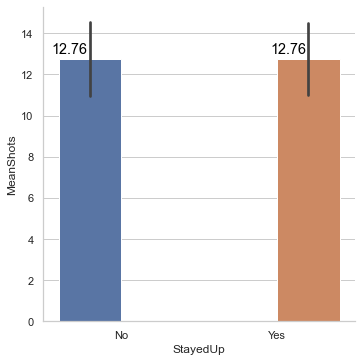

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


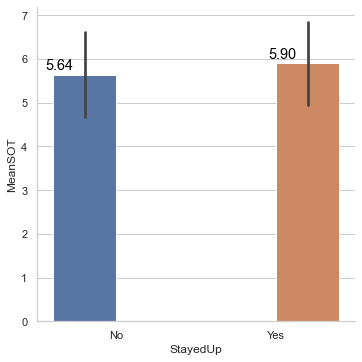

<Figure size 1152x504 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


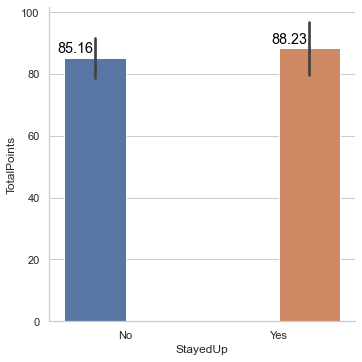

<Figure size 1152x504 with 0 Axes>

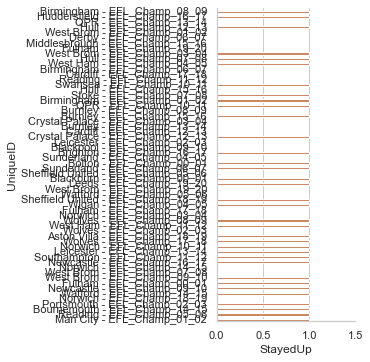

In [95]:
for col in df2.columns[3:]:
    plt.figure()
    sb.set(style="whitegrid")
    g = sb.catplot(x="StayedUp",y=col, hue="StayedUp", kind="bar", data=df2, ci='sd')
    g.set_xticklabels(["No", "Yes"])
    ax = g.facet_axis(0,0)
    for p in ax.patches:
        ax.text(p.get_x() - 0.045, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

#### 

In [19]:
#X_all = df2[['MeanGoals','MeanHomeGoals','MeanAwayGoals','MeanSOT','MeanHomeSOT','MeanAwaySOT','AwayPoints']]

#        'MeanHomeShots', 'MeanAwayShots', 'MeanHomeSOT']]
X_all = df2.drop(['StayedUp','UniqueID','Team','Season','HomePoints','AwayPoints'],1)
y_all = df2['StayedUp']
c = X_all.columns
X_all = preprocessing.StandardScaler().fit(X_all).transform(X_all)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, random_state=7,
                                                    test_size = 0.2)

In [75]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(' - Accuracy - ' + str(score))


y_pred = clf.predict_proba(X_test)
df3 = pd.DataFrame({'Actual': y_test, 'Prediction': clf.predict(X_test), 'Prediction%': y_pred[:,1]})
df3

 - Accuracy - 0.9166666666666666


,Actual,Prediction,Prediction%
44,0,0,0.333333
13,1,1,0.666667
54,1,1,1.000000
56,1,1,0.666667
47,1,1,0.666667
7,1,1,0.666667
2,0,0,0.333333
12,0,0,0.000000
50,0,0,0.333333
40,1,1,0.666667


In [77]:
y_pred = clf.predict_proba(X_all)
df3 = pd.DataFrame({'Actual': y_all, 'Prediction': clf.predict(X_all), 'Prediction%': y_pred[:,1]})
df4 = df2[['Team','Season','StayedUp']]
prediction_df = df3.join(df4)
prediction_df = prediction_df.sort_values('Prediction%')
prediction_df

,Actual,Prediction,Prediction%,Team,Season,StayedUp
12,0,0,0.000000,Hull,EFL_Champ_15_16,0
19,0,0,0.000000,QPR,EFL_Champ_13_14,0
20,0,0,0.000000,Burnley,EFL_Champ_13_14,0
14,0,0,0.000000,Middlesbrough,EFL_Champ_15_16,0
52,0,0,0.000000,Leicester,EFL_Champ_02_03,0
34,1,0,0.333333,Birmingham,EFL_Champ_08_09,1
50,0,0,0.333333,Crystal Palace,EFL_Champ_03_04,0
21,0,0,0.333333,Cardiff,EFL_Champ_12_13,0
30,0,0,0.333333,Blackpool,EFL_Champ_09_10,0
29,1,0,0.333333,Norwich,EFL_Champ_10_11,1


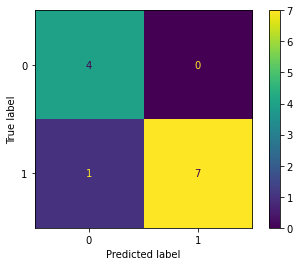

In [22]:
disp = plot_confusion_matrix(clf, X_test, y_test)

1 - Accuracy - 0.8333333333333334
2 - Accuracy - 0.5833333333333334
3 - Accuracy - 0.9166666666666666
4 - Accuracy - 0.8333333333333334
5 - Accuracy - 0.9166666666666666
6 - Accuracy - 0.6666666666666666
7 - Accuracy - 0.75
8 - Accuracy - 0.8333333333333334
9 - Accuracy - 0.6666666666666666
10 - Accuracy - 0.75
11 - Accuracy - 0.75
12 - Accuracy - 0.6666666666666666
13 - Accuracy - 0.5833333333333334
14 - Accuracy - 0.6666666666666666
15 - Accuracy - 0.5833333333333334
16 - Accuracy - 0.4166666666666667
17 - Accuracy - 0.6666666666666666
18 - Accuracy - 0.4166666666666667
19 - Accuracy - 0.5
20 - Accuracy - 0.5
21 - Accuracy - 0.6666666666666666
22 - Accuracy - 0.5833333333333334
23 - Accuracy - 0.6666666666666666
24 - Accuracy - 0.75
25 - Accuracy - 0.75
26 - Accuracy - 0.5833333333333334
27 - Accuracy - 0.4166666666666667
28 - Accuracy - 0.5
29 - Accuracy - 0.5


Text(0, 0.5, 'Accuracy (%)')

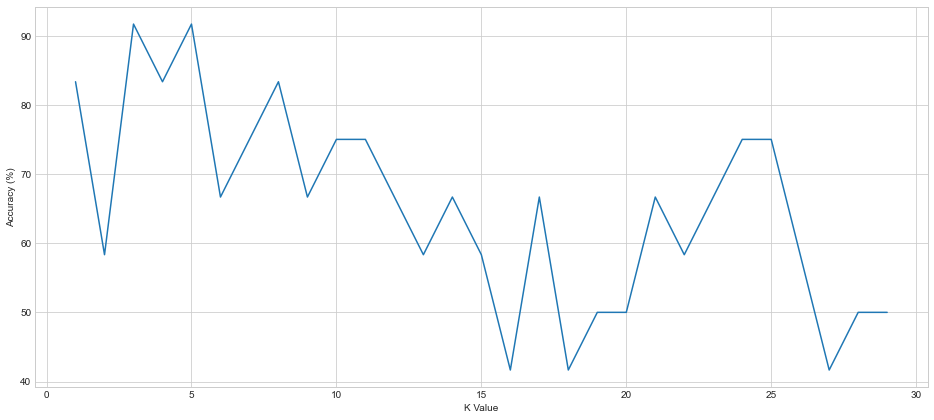

In [80]:
scores=[]
for p in range(1,30):
    clf = KNeighborsClassifier(n_neighbors=p)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(str(p) + ' - Accuracy - ' + str(score))
    scores.append(score*100)
plt.plot(range(1,30),scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy (%)')


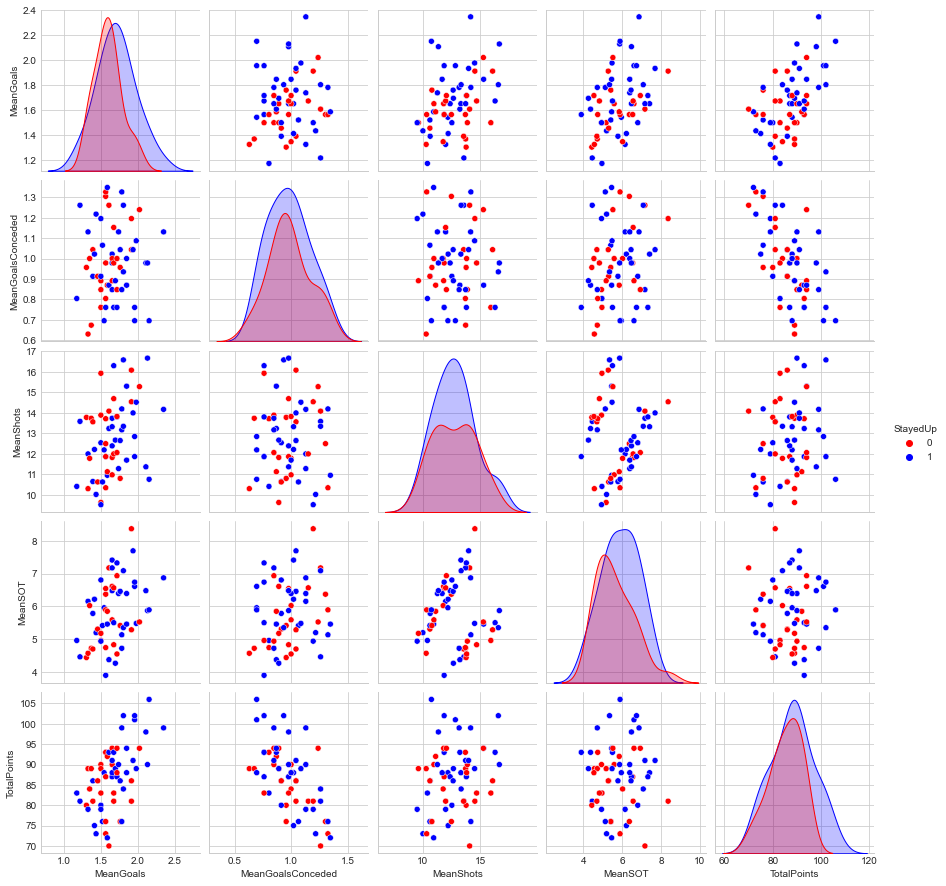

In [79]:
sb.pairplot(data = df2, vars=['MeanGoals','MeanGoalsConceded','MeanShots','MeanSOT','TotalPoints'], hue = 'StayedUp', palette = ['Red', 'Blue'])
plt.savefig('pairplot.png')

In [66]:
a = clf.kneighbors_graph(X=X_all, n_neighbors=None, mode='connectivity')

Feature: 0, Score: 0.01667
Feature: 1, Score: 0.11667
Feature: 2, Score: -0.01667
Feature: 3, Score: 0.05000
Feature: 4, Score: 0.03333
Feature: 5, Score: 0.05000
Feature: 6, Score: 0.05000
Feature: 7, Score: 0.10000
Feature: 8, Score: 0.05000
Feature: 9, Score: -0.03333
Feature: 10, Score: 0.10000
Feature: 11, Score: 0.03333
Feature: 12, Score: 0.05000
Feature: 13, Score: 0.05000
Feature: 14, Score: 0.15000


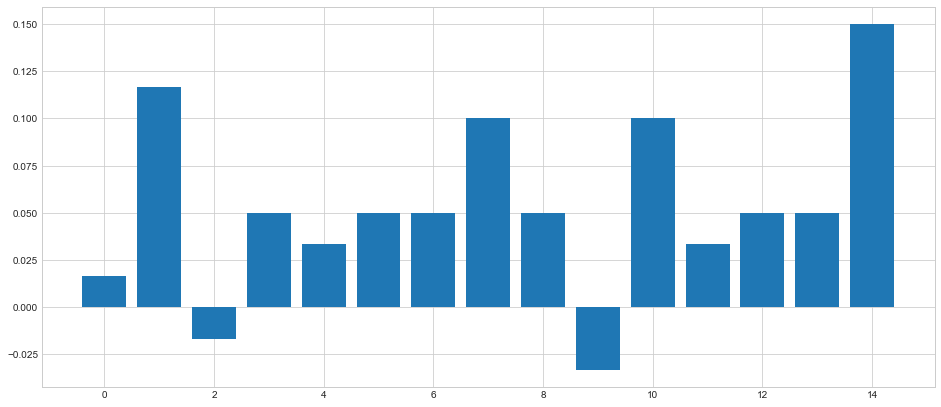

In [65]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification

from sklearn.inspection import permutation_importance

# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = KNeighborsClassifier()
# fit the model
# model.fit(X, y)
# perform permutation importance
results = permutation_importance(clf, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [29]:

from termcolor import colored as cl # elegant printing of text
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # editing visualizations
from matplotlib import style # setting styles for plots
from sklearn.preprocessing import StandardScaler # normalizing data
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.metrics import accuracy_score # algorithm accuracy
from sklearn.model_selection import train_test_split # splitting the data

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 7)

In [37]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(random_state=42)
nca.fit(X_train, y_train)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(' - Accuracy - ' + str(score))
clf.fit(nca.transform(X_train), y_train)
score = clf.score(X_test, y_test)
print(clf.score(nca.transform(X_test), y_test))

 - Accuracy - 0.9166666666666666
0.75


Automatically created module for IPython interactive environment


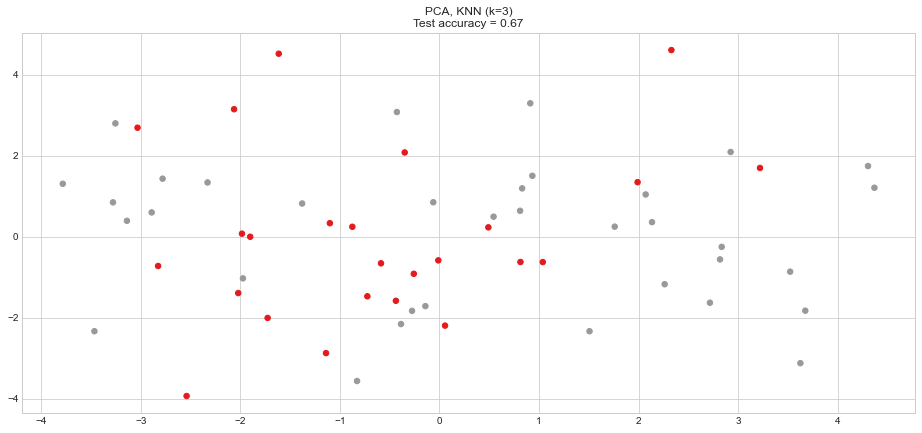

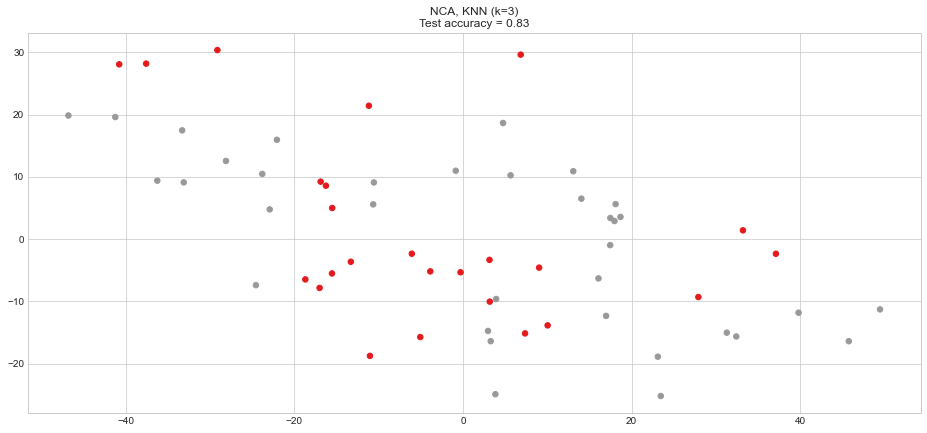

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(__doc__)

n_neighbors = 3
random_state = 0

# Load Digits dataset
# X, y = datasets.load_digits(return_X_y=True)

# # Split into train/test
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=0.5, stratify=y,
#                      random_state=random_state)

dim = len(X_all[0])
n_classes = len(np.unique(y_all))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('NCA', nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_all)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_all, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [ ]:
len(c)